In [58]:
# plotagens
import matplotlib.pyplot as plt
# calculos analiticos
import sympy as sym
# calculos numericos
import numpy as np
# equações diferenciais
from scipy.integrate import odeint
# animações
from matplotlib import animation
# animações
from matplotlib.animation import PillowWriter

In [59]:
# l1 e l1 = comprimento dos fios
# m1 e m2 = massa dos pesos 
# g = gravidade 
# t = tempo
m1, m2, l1, l2, g, t = sym.symbols('m1 m2 l1 l2 g t')

# the1 e the2 angulos do pendulo
the1, the2 = sym.symbols(r'theta1 theta2', cls=sym.Function)

In [60]:
the1 = the1(t)
the2 = the2(t)
the1_d = sym.diff(the1, t) # derivada de the1 no tempo, diz respeito a velocidade angular
the2_d = sym.diff(the2, t)
the1_dd = sym.diff(the1_d, t) # segunda derivada de the1 no tempo, diz respeito a acelaração angular
the2_dd = sym.diff(the2_d, t)

In [61]:
# as coordenadas x e y serão produto do comprimento fio multiplicados pelo seno e coseno do angulos the
x1 = -l1*sym.sin(the1)
y1 = -l1*sym.cos(the1)
x2 = -l1*sym.sin(the2)
y2 = -l1*sym.cos(the2)

# EQUAÇÃO DE LAGRANGE

Definindo os valores de energia cinética (T) e energia potencial (U) de cada massa

T = mV²/2
U = mgh

Neste caso, a única energia potencial é a gravitacional (não considerando os efeitos elásticos do sistema).

O Lagrangiano (L) pode ser definido como a diferença da energia cinética pela potencial

L = T - u

In [62]:
T1 = 1/2*m1*(sym.diff(x1,t)**2 + sym.diff(y1,t)**2)
U1 = y1*m1*g

T2 = 1/2*m2*(sym.diff(x2,t)**2 + sym.diff(y2,t)**2)
U2 = y2*m2*g

T = T1 + T2
U = U1 + U2

L = T - U
L

g*l1*m1*cos(theta1(t)) + g*l1*m2*cos(theta2(t)) + 0.5*m1*(l1**2*sin(theta1(t))**2*Derivative(theta1(t), t)**2 + l1**2*cos(theta1(t))**2*Derivative(theta1(t), t)**2) + 0.5*m2*(l1**2*sin(theta2(t))**2*Derivative(theta2(t), t)**2 + l1**2*cos(theta2(t))**2*Derivative(theta2(t), t)**2)

In [63]:
EqL1 = (sym.diff(L, the1_d, t)-sym.diff(L, the1)).simplify()
EqL2 = (sym.diff(L, the2_d, t)-sym.diff(L, the2)).simplify()
EqL1

l1*m1*(g*sin(theta1(t)) + l1*Derivative(theta1(t), (t, 2)))

In [64]:
sol = sym.solve([EqL1, EqL2], (the1_dd, the2_dd))
sol[the1_dd]

-g*sin(theta1(t))/l1

In [65]:
v1_f = sym.lambdify(the1_d, the1_d)
v2_f = sym.lambdify(the2_d, the2_d)

dv1_f = sym.lambdify((t,g, m1, m2, l1, l2, the1, the2, the1_d, the2_d),sol[the1_dd])
dv2_f = sym.lambdify((t,g, m1, m2, l1, l2, the1, the2, the1_d, the2_d),sol[the2_dd])

In [66]:
def dSdt(S,t,g,m1,m2,l1,l2):
    the1, the2, v1, v2 = S
    return[
        v1_f(v1),
        v2_f(v2),
        dv1_f(t,g,m1,m2,l1,l2,the1,the2,v1,v2),
        dv2_f(t,g,m1,m2,l1,l2,the1,the2,v1,v2),
    ]

In [67]:
t_f = 50
n_passo = 10000
t = np.linspace(0,t_f,n_passo)

# constantes
m1 = 3 
m2 = 3
l1 = 1
l2 = 1.5
g = 9.81

the1_10 = 2
the2_10 = 2
dthe1_10 = 0
dthe2_10 = 0

the1_20 = 2.01
the2_20 = 1.99
dthe1_20 = 0
dthe2_20 = 0

the1_30 = 1.99
the2_30 = 1.99
dthe1_30 = 0
dthe2_30 = 0

resposta1 = odeint(dSdt,y0=[the1_10,the2_10,dthe1_10,dthe2_10],t=t,args=(g,m1,m2,l1,l2))
resposta2 = odeint(dSdt, y0=[the1_20, the2_20, dthe1_20, dthe2_20], t=t,args=(g,m1,m2,l1,l2))
resposta3 = odeint(dSdt, y0=[the1_30, the2_30, dthe1_30, dthe2_30], t=t,args=(g,m1,m2,l1,l2))



In [68]:
resposta1

array([[ 2.        ,  2.        ,  0.        ,  0.        ],
       [ 1.99988847,  1.99988847, -0.04460627, -0.04460627],
       [ 1.99955389,  1.99955389, -0.08921708, -0.08921708],
       ...,
       [ 0.02597948,  0.02597948,  5.27049902,  5.27049902],
       [ 0.05233035,  0.05233035,  5.26857879,  5.26857879],
       [ 0.07866839,  0.07866839,  5.26536806,  5.26536806]])

In [69]:
the1_1t = resposta1.T[0]
the2_1t = resposta1.T[1]
dthe1_1t = resposta1.T[2]
dthe2_1t = resposta1.T[3]

the1_2t = resposta2.T[0]
the2_2t = resposta2.T[1]
dthe1_2t = resposta2.T[2]
dthe2_2t = resposta2.T[3]

the1_3t = resposta3.T[0]
the2_3t = resposta3.T[1]
dthe1_3t = resposta3.T[2]
dthe2_3t = resposta3.T[3]


# VISUALIZAÇÃO DE RESULTADOS

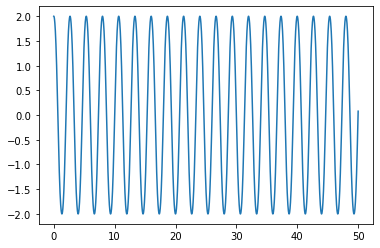

In [70]:
plt.plot(t,the1_1t)

In [71]:
def pos(t,the1,the2,l1,l2):
    x1 = -l1*np.sin(the1)
    y1 = -l1*np.cos(the1)
    x2 = -l1*np.sin(the2) + x1
    y2 = -l1*np.cos(the2) + y1
    return[
        x1, y1, x2, y2
    ]

x11,y11,x12,y12 = pos(t,the1_1t,the2_1t,l1,l2)
x21,y21,x22,y22 = pos(t,the1_2t,the2_2t,l1,l2)
x31,y31,x32,y32 = pos(t,the1_3t,the2_3t,l1,l2)

In [72]:
def animate(i):
    ln1.set_data([0, x1, x12[1]], [0, y11[i], y12[i]])
    ln2.set_data([0, x21, x22[1]], [0, y21[i], y22[i]])
    ln2.set_data([0, x31, x32[1]], [0, y31[i], y32[i]])
    
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    ax.set_facecolor('k')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    ln1 = plt.plot([], [], 'yo--', lw=2, markersize=8)
    ln2 = plt.plot([], [], 'co--', lw=2, markersize=8)
    ln3 = plt.plot([], [], 'go--', lw=2, markersize=8)
    
    ax.set_ylim(-4,4)
    ax.set_xlim(-4,4)
    
    ani = animation.FuncAnimation(fig, animate, frames=n_passo, interval=50)
    ani.save('pen.gif', write='pillow', fps=len(t[t<1]))
    
    